In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import nltk as nlp
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

In [2]:
df=pd.read_csv("Disaster_tweets.csv")

In [3]:
df.head(2)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1


In [4]:
df.tail(2)

,id,keyword,location,text,target
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [5]:
df.keys()

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [6]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=11370, step=1)

In [8]:
df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [10]:
df.id.unique()

array([    0,     1,     2, ..., 11367, 11368, 11369], dtype=int64)

In [11]:
df.target.unique()

array([1, 0], dtype=int64)

In [12]:
df["id"]=df["id"].astype("int16")

In [13]:
df["target"]=df["target"].astype("int16")

In [14]:
df.dtypes

id           int16
keyword     object
location    object
text        object
target       int16
dtype: object

In [15]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [16]:
for k in df.keys():
    print(k,df[k].unique()[:5])

id [0 1 2 3 4]
keyword ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance']
location [nan 'New York City' 'Morgantown, WV' 'OC' 'London, England']
text ['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'
 'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…'
 'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI'
 'Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9'
 '"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8']
target [1 0]


In [17]:
df.location.unique()

array([nan, 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

In [18]:
df.location.value_counts()

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64

In [19]:
df.location.mode()

0    United States
Name: location, dtype: object

In [20]:
df["location"]=df["location"].fillna(df.location.mode()[0])

In [21]:
df.location.unique()

array(['United States', 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

In [22]:
df.keyword.unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'bush%20fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desol

In [23]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

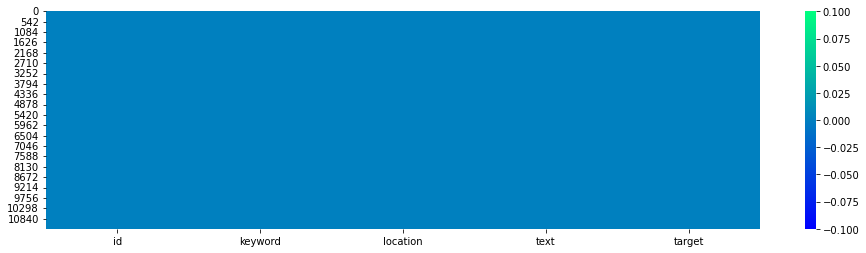

In [24]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull(),cmap="winter")
plt.show()

In [25]:
#Find out highly correlated features
#NA

In [26]:
#Find out correlation and perform visualization using heatmap
# NA

In [27]:
### text data cleaning
df.head(2)

,id,keyword,location,text,target
0,0,ablaze,United States,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,United States,Telangana: Section 144 has been imposed in Bha...,1


In [28]:
df["text"][3]

'Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9'

In [29]:
df["text"][:20]

0     Communal violence in Bhainsa, Telangana. "Ston...
1     Telangana: Section 144 has been imposed in Bha...
2     Arsonist sets cars ablaze at dealership https:...
3     Arsonist sets cars ablaze at dealership https:...
4     "Lord Jesus, your love brings freedom and pard...
5     If this child was Chinese, this tweet would ha...
6     Several houses have been set ablaze in Ngemsib...
7     Asansol: A BJP office in Salanpur village was ...
8     National Security Minister, Kan Dapaah's side ...
9     This creature who’s soul is no longer clarent ...
10    Images showing the havoc caused by the #Camero...
11    Social media went bananas after Chuba Hubbard ...
12    Hausa youths set Area Office of Apapa-Iganmu L...
13    Under #MamataBanerjee political violence &amp;...
14    AMEN! Set the whole system ablaze, man. https:...
15    Images showing the havoc caused by the #Camero...
16    No cows today but our local factory is sadly s...
17    Rengoku sets my heart ablaze😔❤️🔥 P.s. I mi

In [30]:
df["text"][17]

'Rengoku sets my heart ablaze😔❤️🔥 P.s. I missed this style of coloring I do so here it is c: #鬼滅の刃 https://t.co/YrUF9g68s0'

In [31]:
df["text"][300]

'Russia Blames Trump’s Iran Strike on Impeachment: “For Trump, the annihilation of an Iranian General presents a decen…'

In [32]:
sw=stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
def textCleaning(text):
    op = re.sub("https://[a-zA-Z0-9/\.]+"," ",text)
    op = re.sub("[^a-zA-Z0-9]+"," ",op)
    op = re.sub(r"\b\d+(th)?\b"," ",op)
    op = re.sub(r"\b[a-zA-Z0-90]\b"," ",op)
    op = "".join([w for w in op if w not in STOPWORDS])
    op = re.sub(r"\b\w\b"," ",op)
    op = re.sub("\s+"," ",op)
    return op

In [34]:
textCleaning(df.text[300])

'Russ Blmes Tump In Ste on Impechment Fo Tump the nnhlton of Inn Genel pesents decen '

In [35]:
#


In [36]:
textCleaning(df["text"][10])

'Imges showng the hvoc cused by the Cmeoon mlty they toched houses Ou The shmeless mlty epoted '

In [37]:
textCleaning(df["text"][17])

'Rengou sets my het blze mssed ths style of colong do so hee '

In [38]:
df.text=df.text.map(textCleaning)

In [40]:
## infer insights of Data after All the above process are completed using Visualization
df.head(2)


,id,keyword,location,text,target
0,0,ablaze,United States,Communl volence Bhns Telngn Stones wee pelted ...,1
1,1,ablaze,United States,Telngn Secton hs been mposed Bhns fom Jnuy to ...,1


In [41]:
df.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Med should hve wned us well dvnce Ths weced my...,0
11366,11366,wrecked,arohaonces,feel dectly ttced consde moonbn mp jnjn my bs...,0
11367,11367,wrecked,🇵🇭,feel dectly ttced consde moonbn mp jnjn my bs...,0
11368,11368,wrecked,auroraborealis,who emembe outcst nd the do THOSE AU WRECKED ...,0
11369,11369,wrecked,United States,Je Cowy weced whle unnng IRP,1


In [43]:
df.location.isnull().sum()

0

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


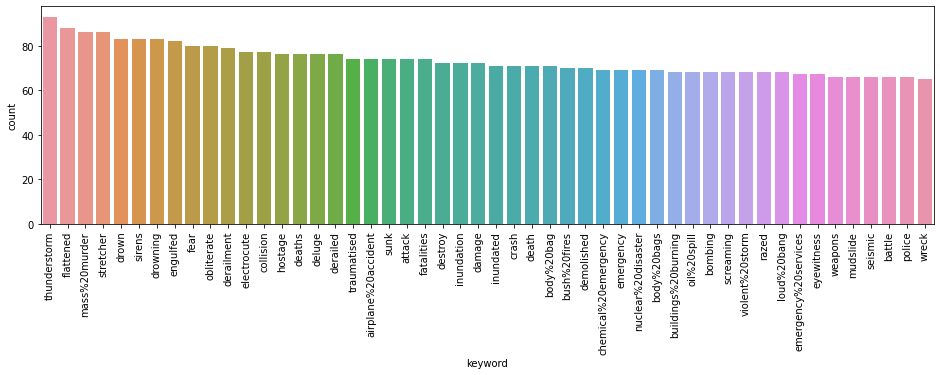

In [51]:
plt.figure(figsize=(16,4))
sns.countplot(df.keyword,order=df.keyword.value_counts().index[:50])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='target', ylabel='Count'>

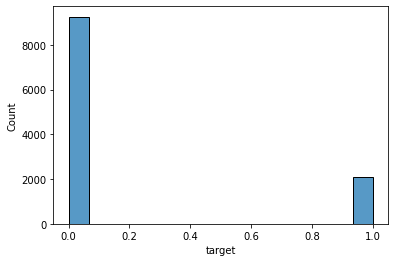

In [52]:
##Histogram for discrete data to understand central tendency of data
sns.histplot(df.target)

In [53]:
##Correlation between various features
# NA

In [55]:
#KDE plot to see how data is spread
# NA

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


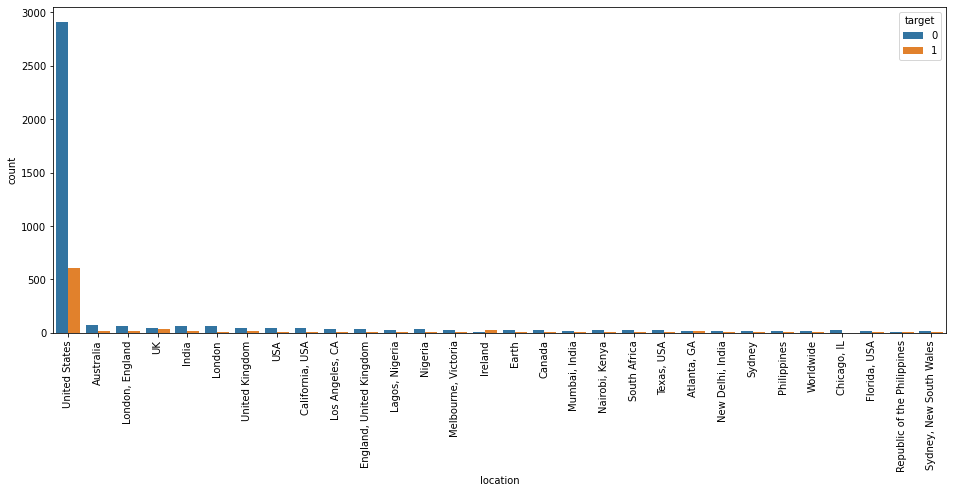

In [57]:
##Bi-variate plot
plt.figure(figsize=(16,6))
sns.countplot(df.location,order=df.location.value_counts().index[:30],hue=df.target)
plt.xticks(rotation=90)
plt.show()

In [60]:
#Text visualization using WordCloud diaster tweet
full_text=" ".join(df.text[df.target==1])
full_text

'Communl volence Bhns Telngn Stones wee pelted on Muslms houses nd some houses nd vehcles wee set blze  Telngn Secton hs been mposed Bhns fom Jnuy to fte clsh eupted between two goups on Jnuy Po  Asonst sets cs blze deleshp  Asonst sets cs blze deleshp  Sevel houses hve been set blze Ngemsb vllge Ou sub dvson the Noth West Regon of Cmeoon by  Asnsol BJP offce Slnpu vllge ws set blze lst nght BJP hs lleged tht TMC behnd the ncdent Polce hs  Imges showng the hvoc cused by the Cmeoon mlty they toched houses Ou The shmeless mlty epoted  Hus youths set Ae Offce of App Ignmu Locl Councl Development Ae blze Od Rdes stomed the LG offce  Unde MmtBnejee poltcl volence mp vndlsm contnues to unbted West Bengl offce Asnol ws  Imges showng the hvoc cused by the Cmeoon mlty they toched houses Ou The shmeless mlty  No cows tody but ou locl fctoy sdly stll blze REDJnuy2020  Fench cmeoun set houses blze Ndu nd osted two young boys the homes tgeted llngs GenocdeInSou  Cmeoon BIR soldes on the nvded the S

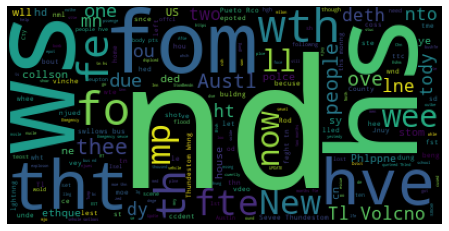

In [67]:
wc= WordCloud()
image=wc.generate_from_text(full_text)
plt.figure(figsize=(16,4))
plt.axis("off")
plt.imshow(image)


# no diaster tweet

In [69]:
final_text=" ".join(df.text[df.target==0])

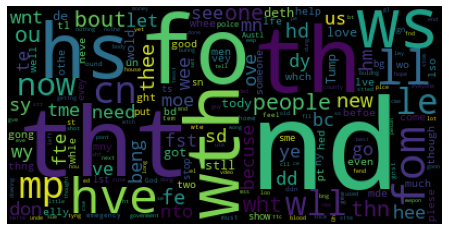

In [71]:
wc=WordCloud()
image=wc.generate_from_text(final_text)
plt.figure(figsize=(16,4))
plt.axis("off")
plt.imshow(image)

# tweeter mask 

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\PIL\IcoImagePlugin.py:316: UserWarning: Image was not the expected size
  warnings.warn("Image was not the expected size")


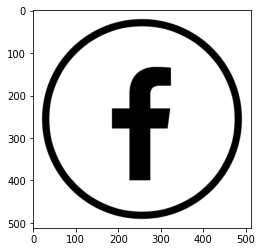

In [79]:
mask=plt.imread("fac_logo.jpg")
plt.imshow(mask)
plt.show()

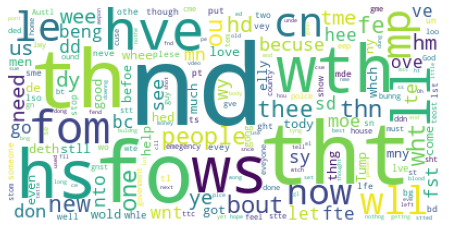

In [80]:
wc=WordCloud(background_color="white")
image=wc.generate_from_text(final_text)
plt.figure(figsize=(16,4))
plt.imshow(image)
plt.axis("off")
plt.show()